In [1]:
# Read and plot tidal results in the fjord-shelf grid
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import gsw
import os

In [2]:
sd = 3 # Sill depth
file1 = xr.open_dataset('/Users/weiyangbao/Documents/Model_outputs/qf-tide/state_' + str(format(sd,'03d')) + '.nc')
state1 = file1.isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40)) # Remove the boundary walls and the shelf region
# Fjord Range: X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40) 
time = state1.T.data / 3600
x = state1.X.data / 1000
z = state1.Z.data
y = state1.Y.data / 1000
ssa = state1.Eta.data # Sea surface anomaly (m), in T, Y, X dimensions
u0 = state1.U.data
v0 = state1.V.data
w0 = state1.W.data
u_ymean = (u0[:, :, :, 1:].mean(2) + u0[:, :, :, :-1].mean(2)) / 2
u_c = (u0[:, :, 4, 1:] + u0[:, :, 4, :-1]) / 2
u_surf = (u0[:, 0, :, 1:] + u0[:, 0, :, :-1]) / 2
v = (v0[:,:,1:,:] + v0[:,:,:-1,:]) / 2
v_surf = v[:,0,:,:]
w_ymean = w0[:,:,:,:].mean(2)
w_c = w0[:,:,4,:]
w_surf = w0[:,0,:,:]

mag_x = np.sqrt(u_ymean**2 + w_ymean**2)
mag_c = np.sqrt(u_c**2 + w_c**2)
mag_surf = np.sqrt(v_surf**2 + u_surf**2)
mag_surf.max(), mag_x.max(),mag_c.max()
state1.T

<xarray.DataArray 'T' (T: 15)>
array([     0.,  43200.,  86400., 129600., 172800., 216000., 259200., 302400.,
       345600., 388800., 432000., 475200., 518400., 561600., 604800.])
Coordinates:
  * T        (T) float64 0.0 4.32e+04 8.64e+04 ... 5.184e+05 5.616e+05 6.048e+05
Attributes:
    long_name:  model_time
    units:      s

In [3]:
fig_path = "/Users/weiyangbao/Documents/Jupyter_Figs/qf-tide/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

In [ ]:
for t in range(2):
    fig0, ax = plt.subplots(figsize=(15,5))  

    ct = np.linspace(0,2,20) # Contour range for temperature 0.02
    eta = ssa[t,:,:]
    plt.contourf(x,y,eta, ct, cmap = 'RdYlBu_r')
    cbar = plt.colorbar(ticks = np.linspace(0,2,9))
    cbar.ax.tick_params(labelsize = 15)
    cbar.set_label('Free surface elevation (m)', size = 20, weight = 'bold')

    ax.set_xlim([0,x[-1]])
#ax.set_xticklabels(np.linspace(0,10,6, dtype = int), size = 20)
    ax.set_ylim([y[0],y[-1]])
#ax.set_yticklabels(np.linspace(-150,0,11, dtype = int), size = 20)
    plt.yticks(fontsize = 20)
    plt.xticks(fontsize = 20)
    ax.set_xlabel('Distance from glacier [km]', size = 20)
    ax.set_ylabel('Width [m]', size = 20)
    plt.title('Hour ' + str(t), size = 20)
    #plt.close()
    #fig0.savefig(fig_path + '/Eta' + format(t, '03d') + '.png', dpi = 200, bbox_inches='tight')

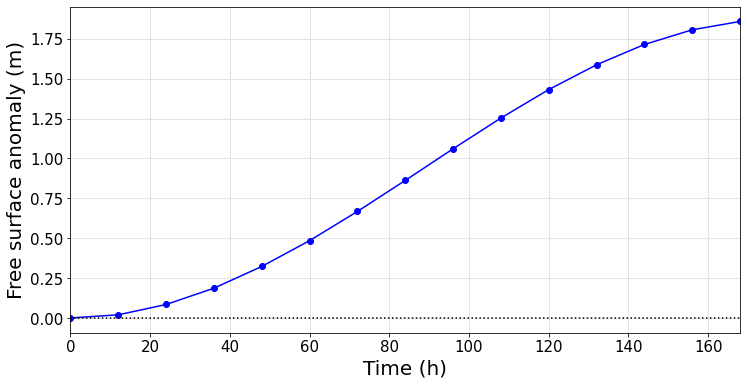

In [8]:
fig1, ax =plt.subplots(figsize=(12,6))
ax.set_xlim([0,time[-1]])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Time (h)', size=20)
plt.ylabel('Free surface anomaly (m)', size=20)
ax.plot(time, ssa[:,4,18], 'o-b') # x = 1, 45, 115
ax.axhline(y=0,color='k',linestyle=':')
ax.grid(linestyle='--', linewidth='0.5')
#plt.title('Fjord Mouth', size = 20, weight = 'bold')
#fig1.savefig(fig_path + '/Eta.png', dpi = 200, bbox_inches='tight')

In [5]:
for t in range(48):
    fig2, ax = plt.subplots(figsize=(15,3))  

    ct = np.linspace(0,0.5,20) # Contour range for 0.02, 0.45
    vel = mag_x[t,:,:]
    ut = u_ymean[t,:,:]
    wt = w_ymean[t,:,:]
    mask = (vel == 0)
    vel[mask] = np.nan
    plt.contourf(x,z,vel, ct, cmap = 'RdYlBu_r')
    cbar = plt.colorbar(ticks = np.linspace(0,0.5,6))
    cbar.ax.tick_params(labelsize = 15)
    cbar.set_label('Velocity (m/s)', size = 15, weight = 'bold')
    

    #ax.axvline(x=x[119],color='r',lw=2)
# Plot velocity(Z, X) field
    ut[[1,2,4,5,7,8,10,12,14,16,18,20,22,24,26,28], :] = np.nan
    wt[[1,2,4,5,7,8,10,12,14,16,18,20,22,24,26,28], :] = np.nan
    #ut[:,1:1:-1] = np.nan
    #wt[:,1:1:-1] = np.nan
    #ut[:,::3] = np.nan
    #wt[:,::3] = np.nan
    ut[::2,:] = np.nan
    wt[::2,:] = np.nan   
    Q = ax.quiver(x[::5],z,0.1*ut[:,::5],0.1*wt[:,::5],width=0.001, scale=1)
#ax.quiverkey(Q, 0.7, 0.89, 0.2,r'0.2 $m/s$', fontproperties={'weight': 'bold', 'size' : 10}, coordinates='figure')

    ax.set_xlim([0,max(x)])
#ax.set_xticklabels(np.linspace(0,10,6, dtype = int), size = 20)
    ax.set_ylim([min(z),0])
#ax.set_yticklabels(np.linspace(-150,0,11, dtype = int), size = 20)
    plt.yticks(fontsize = 15)
    plt.xticks(fontsize = 15)
    ax.set_xlabel('Distance from glacier [km]', size = 15)
    ax.set_ylabel('Depth [m]', size = 15)
    plt.title('Hour ' + str(t), size = 15)
    plt.close()
    fig2.savefig(fig_path + '/AFvel30' + format(t, '03d') + '.png', dpi = 200, bbox_inches='tight')

In [ ]:
for t in range(48):
    fig3, ax = plt.subplots(figsize=(15,5))  

    ct = np.linspace(0,0.05,20) # Contour range for temperature 0.02
    vel = mag_surf[t,:,:]
    mask = (vel == 0)
    vel[mask] = np.nan
    vt = v[t,0,:,:]
    u_surft = u_surf[t,:,:]
    plt.contourf(x,y,vel, ct, cmap = 'RdYlBu_r')
    cbar = plt.colorbar(ticks = np.linspace(0,0.05,6))
    cbar.ax.tick_params(labelsize = 15)
    cbar.set_label('Velocity (m/s)', size = 20, weight = 'bold')    
    ax.axvline(x=x[71],color='b',lw=2)
    #u_surft[:,::2] = np.nan
    #vt[:,::2] = np.nan   
    Q = ax.quiver(x[::5],y,u_surft[:,::5],vt[:,::5], width=0.001, scale=1)

    ax.set_xlim([0,max(x)])
    ax.set_ylim([y[0],y[-1]])
    plt.yticks(fontsize = 15)
    plt.xticks(fontsize = 15)
    ax.set_xlabel('Distance from glacier [km]', size = 15)
    ax.set_ylabel('Width [km]', size = 15)
    plt.title('Hour ' + str(t), size = 15)
    plt.close()
    fig3.savefig(fig_path + '/PlanFjord150' + format(t, '03d') + '.png', dpi = 200, bbox_inches='tight')

In [6]:
# Generate GIF from saved output figures
import imageio
import glob

images = []
imagenames = sorted(glob.glob(fig_path + '/AFvel30*.png'))

for filename in imagenames:
    images.append(imageio.imread(filename))
imageio.mimsave(fig_path + 'AFvel30.gif', images, duration=.5)